# Michał Filipiuk 385423
## GSN assignment 2

In [1]:
%load_ext autoreload
%autoreload 2

### Imports 

In [98]:
import numpy as np
import torch
from collections import Counter
import matplotlib.pyplot as plt

from src.data_loading import *
from src.model import *
from src.corpus_preprocessor import CorpusPreprocessor
from src.plotting import *

### Setting env, loading data

In [3]:
config = load_config()
torch.cuda.set_device(config["DEVICE_NUMBER"])

sentences = read_sentences(config)
corpus_preprocessor = CorpusPreprocessor()

### Preprocessing

In [4]:
transformed_sentences = corpus_preprocessor.transform_text(sentences)

In [5]:
x = corpus_preprocessor.encode_text(corpus_preprocessor.mask_text(transformed_sentences))

### Starting NN

In [6]:
net = LanguageModel().cuda()

In [7]:
data_loader = DataLoader(x)

### Training

In [8]:
net.train(data_loader, n_epoch=1)

Starting training...
epoch: 1, lloss: -0.52072
0.684


## T-SNE

In [22]:
word_embedder = net.get_word_embedder()

In [52]:
words = " ".join(transformed_sentences).split()

In [53]:
cnt = Counter()
for w in words:
    cnt[w] += 1

I'd like to start with analyzing group of most popular 100 words. I split them by length into three subsets:
- x \>= 5
- 5 > x >= 2
- 2 > x

We start with medium length words:
T-SNE splits words into 15 different clusters accordingly to the first letter of words. It maybe related to my implementation of words embedding which is character-wise.

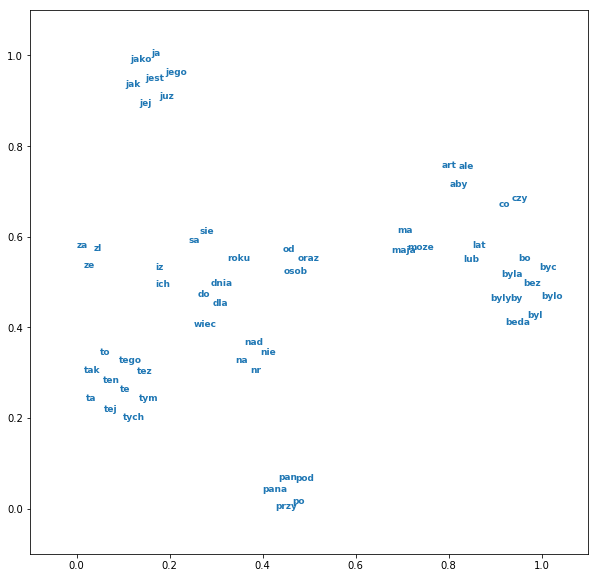

In [129]:
inputs = [a[0] for a in cnt.most_common(100) if len(a[0]) < 5 and len(a[0]) >= 2]
plot_embeddings(dict(zip(inputs,[0]*len(inputs))), corpus_preprocessor, word_embedder, learning_rate=300, perplexity=10, n_iter = 1000)

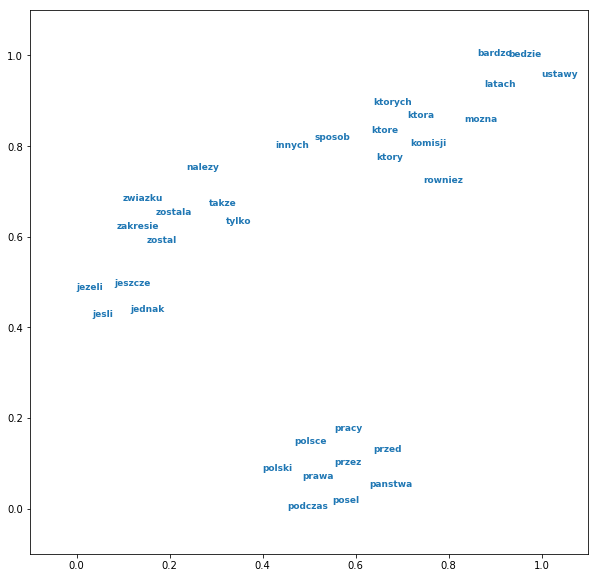

In [118]:
inputs = [a[0] for a in cnt.most_common(100) if len(a[0]) >= 5]
plot_embeddings(dict(zip(inputs,[0]*len(inputs))), corpus_preprocessor, word_embedder, learning_rate=200, perplexity=9, n_iter = 420)

Ok, so at the end we have the one letter words. There are too little of them to analyze any relationships - I could juggle with hyperparameters to get the desired outcome.

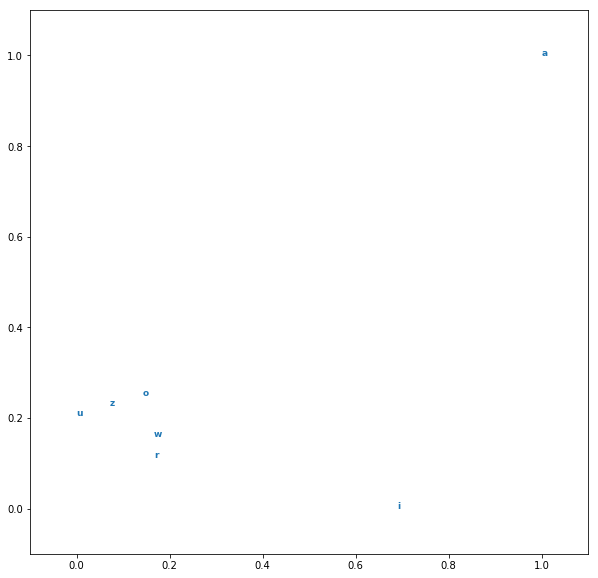

In [139]:
inputs = [a[0] for a in cnt.most_common(100) if len(a[0]) < 2]
plot_embeddings(dict(zip(inputs,[0]*len(inputs))), corpus_preprocessor, word_embedder, learning_rate=1, perplexity=10, n_iter = 250)